In [119]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
dashboard = {
        "Categoria": "",
        "Tema": [],
        "Datos": [],
        "Datos_con_informacion": [],
        "Datos_sin_informacion": [],
        "Source_information": ""
    }

In [3]:
df_data_all = pd.read_csv("./KPIs.csv")

In [4]:
# Elimino las últimas tres columnas
df_data = df_data_all.iloc[ : , :-3]

In [5]:
# Le doy formato a los campos que tienen Si para que sean Sí
df_data.loc[df_data['¿Se tiene?'] == 'Si' , '¿Se tiene?'] = 'Sí'
df_data.loc[df_data['Campo agregado'] == 'Si' , 'Campo agregado'] = 'Sí'

# FILTRACIÓN POR LA COLUMNA CATEGORIA

In [6]:
#Obtengo todas las categorias que existen
categories = df_data['CATEGORIA'].unique()
categories

array(['Cap 1000', 'Energía eléctrica', 'Suministro de Agua',
       'Servicios Profesionales', 'Viáticos', 'Orden social', 'Inmuebles',
       'Papeleria', 'Alimentos', 'TI'], dtype=object)

In [25]:
#Trabajo unicamente con la categoria de la posicion 3
category = categories[5]

In [26]:
dashboard['Categoria'] = category

In [27]:
print(dashboard['Categoria'])

Orden social


## TEMA

In [28]:
#Creo una función que me regresa todos los tema de una categoria
def filter_column(data, column_of_value, value, column_filter):
    """
    Se va a filtar todos los datos con respecto al valor de una columna proporcionada, 
    pero únicamente se va a mostrar los valores de la columna filtrada.
    ES NECESARIO QUE EN DATA SEA TODA LA TABLA DE LOS DATOS.
    COLUMN_OF_VALUE es únicamente el nombre la columna.
    COLUMN_FILTER es únicamente el nombre la columna.
    """
    arr_tema = data[ data[column_of_value] == value][column_filter].dropna().unique()
    return arr_tema

In [29]:
theme = filter_column(df_data,'CATEGORIA', category, 'TEMA')
dashboard['Tema'] = theme
print(dashboard['Tema'])

['Costo' 'Eventos' 'Congresos' 'Capacitación']


# Datos

In [30]:
def every_data(data, name_column_category , category, name_column_tema, tema, name_column_values):
    """
    Se va a obtener el total de datos, cuántos datos se tiene y cuantos no, esto mediante un filtrado de todos los datos (data) 
    mediante las columnas de la categoria y del tema en donde se indicará cuál es la categoria y el tema para hacer el filtrado. 
    Una vez hecho esa filtración sólo se va a obtener la columna indicada en 'name_column_values' para determinar el tamaño de los datos
    y de estos datos cuántos tienen Sí y cuántos No.
    """
    data_of_values = []
    arr_values = data[name_column_values].loc[( data[name_column_category] == category ) & (data[name_column_tema] == tema )].dropna().unique()
    data_total = data[name_column_values].loc[(data[name_column_category] == category) & (data[name_column_tema] == tema)].size
    for i in range(arr_values.size):
        data_of_values.append(data[name_column_values].loc[(data[name_column_category] == category) & 
                                                                                  (data[name_column_tema] == tema) & 
                                                                                  (data[name_column_values] == arr_values[i]) ].count())
    return data_total, arr_values, data_of_values

In [31]:
def get_i(word, array):
    """
    Con base a un arreglo se buscará una paralabra y retornará la iteral de esa ubicación.
    """
    for i in range(len(array)):
        if(word == array[i]):
            return i
    return -1

In [32]:
arr_total_datos = []
arr_sin_datos = []
arr_con_datos = []
for j in range(theme.size):
  arr_total_datos.append(every_data(df_data, 'CATEGORIA', category, 'TEMA', theme[j], '¿Se tiene?' )[0])

  i = get_i('Sí', every_data(df_data, 'CATEGORIA', category, 'TEMA', theme[j], '¿Se tiene?' )[1])
  # Operación ternaria donde si nos devuelve un True es porque no existe esa palabra por ende el valor es 0, 
  # en caso de que devuelva la iteral esa la usamos para el array de every_data

  value = 0 if i == -1 else every_data(df_data, 'CATEGORIA', category, 'TEMA', theme[j], '¿Se tiene?' )[2][i]
  arr_con_datos.append(value)

  i = get_i('No', every_data(df_data, 'CATEGORIA', category, 'TEMA', theme[j], '¿Se tiene?' )[1])
  value = 0 if i == -1 else every_data(df_data, 'CATEGORIA', category, 'TEMA', theme[j], '¿Se tiene?' )[2][i]
  arr_sin_datos.append(value)
  
  print()
dashboard['Datos'] = arr_total_datos
dashboard['Datos_con_informacion'] = arr_con_datos
dashboard['Datos_sin_informacion'] = arr_sin_datos


# FUENTE DE INFORMACIÓN

In [33]:
dashboard['Source_information'] = filter_column(df_data,'CATEGORIA', category, 'ORIGEN')
print(dashboard['Source_information'])

['Facturas']


# Dashboard

In [34]:
print(dashboard)

{'Categoria': 'Orden social', 'Tema': array(['Costo', 'Eventos', 'Congresos', 'Capacitación'], dtype=object), 'Datos': [4, 2, 2, 2], 'Datos_con_informacion': [3, 2, 0, 0], 'Datos_sin_informacion': [1, 0, 2, 2], 'Source_information': array(['Facturas'], dtype=object)}


In [90]:
def percentage(dashboard):
    """
    Función que regresa dos arrays, el porcentaje de los datos con información y sin información de un tema.
    """
    arr_percentage_without_information = []
    arr_percentage_with_information = []
    for i in range(len(dashboard['Datos'])):
        porcentaje_con_informacion = ((dashboard['Datos_con_informacion'][i]*100)/dashboard['Datos'][i])/100
        porcentaje_sin_informacion = (1-porcentaje_con_informacion)
        #print(porcentaje_con_informacion, porcentaje_sin_informacion) 
        arr_percentage_without_information.append(porcentaje_sin_informacion)
        arr_percentage_with_information.append(porcentaje_con_informacion)
    return arr_percentage_with_information, arr_percentage_without_information


In [87]:

percentage(dashboard)



0.75 0.25
1.0 0.0
0.0 1.0
0.0 1.0


([0.75, 1.0, 0.0, 0.0], [0.25, 0.0, 1.0, 1.0])

## Gráficación


In [37]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [38]:
import matplotlib.pyplot as plt

In [43]:
title = dashboard['Categoria']
etiquetas = dashboard['Tema']
valores = dashboard['Datos']
print(f"""
El titulo es: {title}
Las etiquetas son: {etiquetas}
Los valores son: {valores}
""")


El titulo es: Orden social
Las etiquetas son: ['Costo' 'Eventos' 'Congresos' 'Capacitación']
Los valores son: [4, 2, 2, 2]



In [152]:
def rotate_figure(i, arr):
    sum = 0
    if i<0:
        return sum    
    for j in range(len(arr)):
        if(i <= j):
            sum = sum + arr[j]*10
            return sum
        else:
            sum = sum + arr[j]*10
    return False

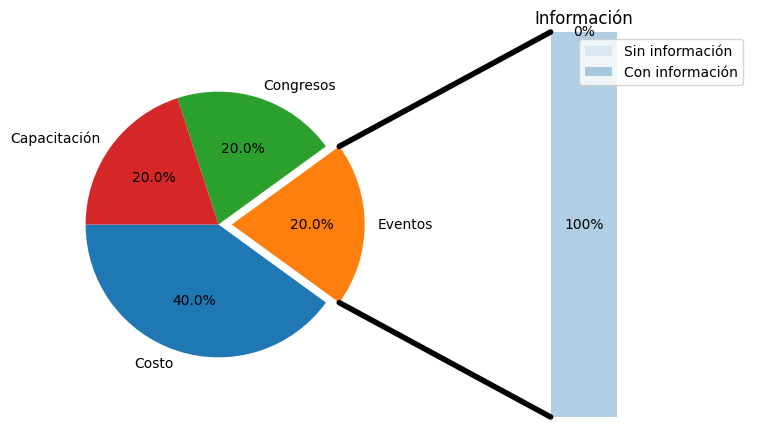

In [171]:
from matplotlib.patches import ConnectionPatch
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=.1)

i=1
# pie chart parameters
overall_ratios = valores
labels = etiquetas
explode = np.zeros(len(overall_ratios))
explode[i] = .1
# rotate so that first wedge is split by the x-axis
angle = - (3.6*rotate_figure(i-1,overall_ratios)/2) -(3.6*rotate_figure(i,overall_ratios) )/2 
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [percentage(dashboard)[0][i], percentage(dashboard)[1][i]]
age_labels = ['Con información', 'Sin información']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Información')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[i].theta1, wedges[i].theta2
center, r = wedges[i].center, wedges[i].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [170]:
explode = np.zeros(len(overall_ratios))
explode[i] = .1
print(explode)


[0.  0.1 0.  0. ]
